# Analysis of Supermarket Sales Among Three Branches

### Description of Data

The dataset is obtained from Kaggle. You may view the entry at this following link: https://www.kaggle.com/aungpyaeap/supermarket-sales

The dataset consists of 1000 sales records of three supermarket branches (A,B,C) obtained over three months and captures certain customer features such as customer type, gender, product line, quantity, etc.... Each branch is located in a separate city for a total of three cities (Yangon, Naypyitaw*, Mandalay). 

The Kaggle description does not mention the country of origin, though a quick Google search makes it clear that the cities belong in the country Myanmar, a Southeast Asian country bordering India and Bangladesh. Myanmar has a moderately sized population of about 53 million people, and the predominant religion is Buddhism (87.9%). 

\* A small discrepancy is found in the spelling of Naypyitaw. Per Wikipedia, the label is Naypyidaw. However, it is officially spelled as 'Nay Pyi Taw'. For the purpose of this analysis, I went along with the data entry value 'Naypitaw', and that is how it will be spelled for the total of this project.

##### Attribute Information

*Invoice id*: Computer generated sales slip invoice identification number

*Branch*: Branch of supercenter (3 branches are available identified by A, B and C).

*City*: Location of supercenters

*Customer type*: Type of customers, recorded by Members for customers using member card and Normal for without member card.

*Gender*: Gender type of customer

*Product line*: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel

*Unit price*: Price of each product in \\$

*Quantity*: Number of products purchased by customer

*Tax*: 5% tax fee for customer buying

*Total*: Total price including tax

*Date*: Date of purchase (Record available from January 2019 to March 2019)

*Time*: Purchase time (10am to 9pm)

*Payment*: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)

*COGS*: Cost of goods sold

*Gross margin percentage*: Gross margin percentage

*Gross income*: Gross income

*Rating*: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

### Purpose

The purpose of this analysis to examine the 1000 sales transactions of the three branches and derive insights. Exploratory data research and visualization will help understand any patterns that may be present.

In addition, I'll attempt to a simple linear regression to see if sales totals can be predicted based on some of the features. 




At the end, I've written a conclusion with my takeaways following the analysis, along with some recommendations.

## Analysis

#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('supermarket_sales - Sheet1.csv')

#### Dataset

In [3]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


gross margin percentage seems to be a repeat value 4.761905. Confirm that later


#### Summary Stats

In [63]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unit price,1000.0,55.672130,2.649463e+01,10.080000,32.875000,55.230000,77.935000,99.960000
Quantity,1000.0,5.510000,2.923431e+00,1.000000,3.000000,5.000000,8.000000,10.000000
Tax 5%,1000.0,15.379369,1.170883e+01,0.508500,5.924875,12.088000,22.445250,49.650000
Total,1000.0,322.966749,2.458853e+02,10.678500,124.422375,253.848000,471.350250,1042.650000
cogs,1000.0,307.587380,2.341765e+02,10.170000,118.497500,241.760000,448.905000,993.000000
gross margin percentage,1000.0,4.761905,6.220360e-14,4.761905,4.761905,4.761905,4.761905,4.761905
gross income,1000.0,15.379369,1.170883e+01,0.508500,5.924875,12.088000,22.445250,49.650000
Rating,1000.0,6.972700,1.718580e+00,4.000000,5.500000,7.000000,8.500000,10.000000
Top 100,1000.0,0.100000,3.001501e-01,0.000000,0.000000,0.000000,0.000000,1.000000


1000 records in dataset with a mean total of 322.97 and mean gross income of 15.38. 

In [5]:
df['gross margin percentage'].nunique()

1

assumption correct. gross margin percentage column is the same value

Check for any null values ... 

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
Invoice ID                 1000 non-null object
Branch                     1000 non-null object
City                       1000 non-null object
Customer type              1000 non-null object
Gender                     1000 non-null object
Product line               1000 non-null object
Unit price                 1000 non-null float64
Quantity                   1000 non-null int64
Tax 5%                     1000 non-null float64
Total                      1000 non-null float64
Date                       1000 non-null object
Time                       1000 non-null object
Payment                    1000 non-null object
cogs                       1000 non-null float64
gross margin percentage    1000 non-null float64
gross income               1000 non-null float64
Rating                     1000 non-null float64
Month                      1000 non-null object
Hour                    

There are no null values. Yay!

lets look at types of products sold

In [6]:
df['Product line'].unique()

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

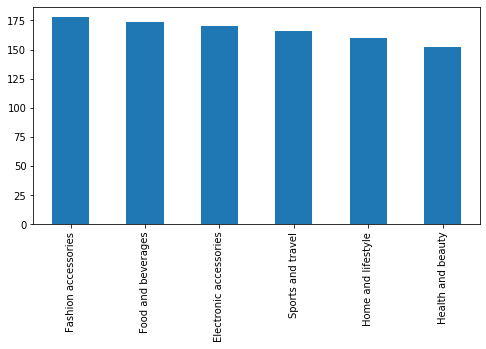

In [7]:
fig = plt.figure(figsize = (8,4))
df['Product line'].value_counts().plot(kind='bar', )

fashion accessories is the dominant product line, while health and beauty is the least frequent product line

lets get more specific with mean. What is the mean income in each product line?

In [8]:
def product_line_mean():
    for line in df['Product line'].unique():
        print(line + ' mean: ${:0.2f}'.format(df[df['Product line'] == line].mean()['gross income']))
        
productline_means = product_line_mean()

Health and beauty mean: $15.41
Electronic accessories mean: $15.22
Home and lifestyle mean: $16.03
Sports and travel mean: $15.81
Food and beverages mean: $15.37
Fashion accessories mean: $14.53


Home and lifestlye products have the highest mean income at $16.03

most common payment

In [9]:
df['Payment'].value_counts()

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

ewallet and cash are nearly tied as most common payments

which payment has highest mean total?

In [10]:
for paytype in df['Payment'].unique():
        print(paytype + ' mean: ${:0.2f}'.format(df[df['Payment'] == paytype]['Total'].mean()))

Ewallet mean: $318.82
Cash mean: $326.18
Credit card mean: $324.01


Looks like they're fairly close, but cash is the payment type with highest average total at $326.18. Is cash a good predictor that a customer will buy more?

most common gender is closely tied

In [11]:
df['Gender'].value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

is each gender more associated with certain product lines?

Text(0.5, 1.0, 'Male')

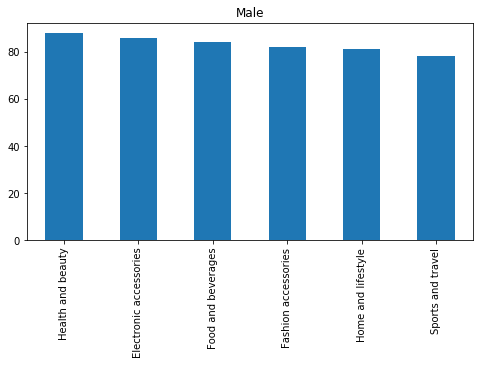

In [12]:
plt.figure(figsize = (8,4))
df[df['Gender'] == 'Male']['Product line'].value_counts().plot(kind='bar')

plt.title('Male')

fairly consistent, though health and beauty products are the most frequent purchase

Text(0.5, 1.0, 'Female')

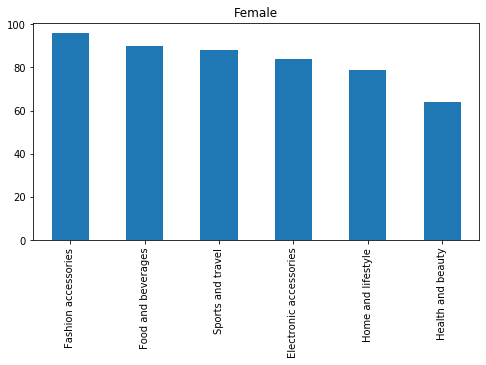

In [13]:
plt.figure(figsize = (8,4))
df[df['Gender'] == 'Female']['Product line'].value_counts().plot(kind='bar')

plt.title('Female')

Here we see a different story. It seems that 'fashion accessories' are the most common product type purchased by females. 'Health and beauty' is the least frequent, which is the opposite of the results for males.

lets look at city branch data

Yangon branch represents the most sales in this data, however, the branches are tied fairly close 

In [14]:
df['City'].value_counts()

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64

Naypyitaw has the most total sales at 110,568.71 and most gross income at 5,265.18

In [15]:
for city in df['City'].unique():
    print(city + ' ${:0.2f}'.format(df[df['City'] == city]['Total'].sum()))



Yangon $106200.37
Naypyitaw $110568.71
Mandalay $106197.67


In [16]:
for city in df['City'].unique():
    print(city + ' ${:0.2f}'.format(df[df['City'] == city]['gross income'].sum()))

Yangon $5057.16
Naypyitaw $5265.18
Mandalay $5057.03


for total sales, the distribution is as follows ...

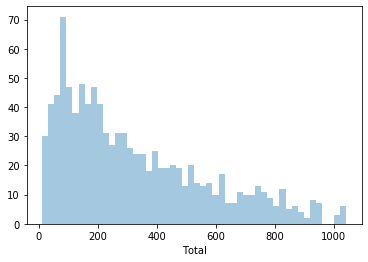

In [17]:
sns.distplot(df['Total'], kde = False, bins = 50)

most of the purchase totals fall below 200 dollars

sales totals by branch

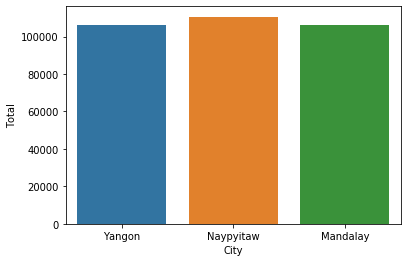

In [18]:
sns.barplot(df['City'], df['Total'], estimator = sum, ci = None)

totals of each payment type split by gender

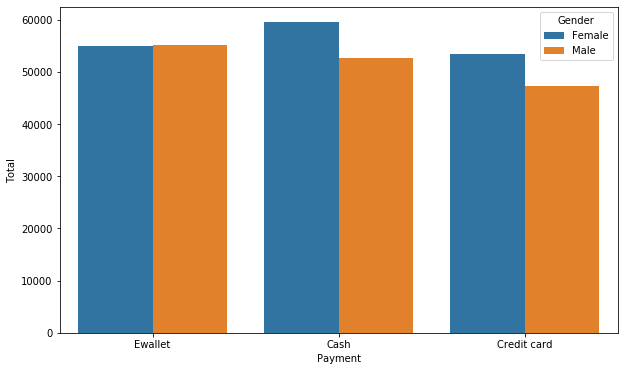

In [19]:
plt.figure(figsize = (10,6))
sns.barplot(y = df['Total'], x = df['Payment'], orient = 'v', hue=df['Gender'], estimator = sum, ci = None)

totals of each payment type split by customer type

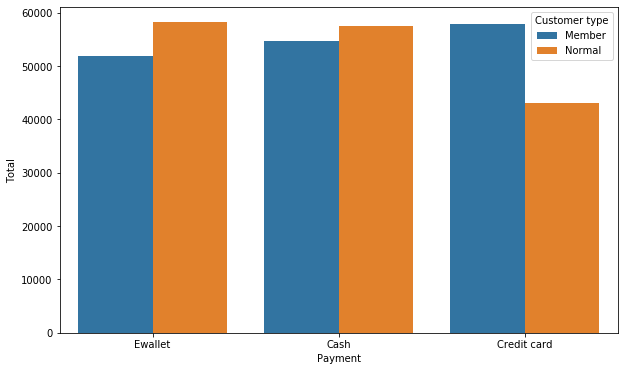

In [20]:
plt.figure(figsize = (10,6))
sns.barplot(x = df['Payment'], y = df['Total'], estimator = sum, hue = df['Customer type'], ci = None)

comparing product types purchased between members and normal customers. Members spend more in most categories, especially in 'Food and beverages'. However, normal customers are seen spending more than members in the 'Electronic accessories' category. What might be the cause of this? Is there a lack of promotions for members in this category? 

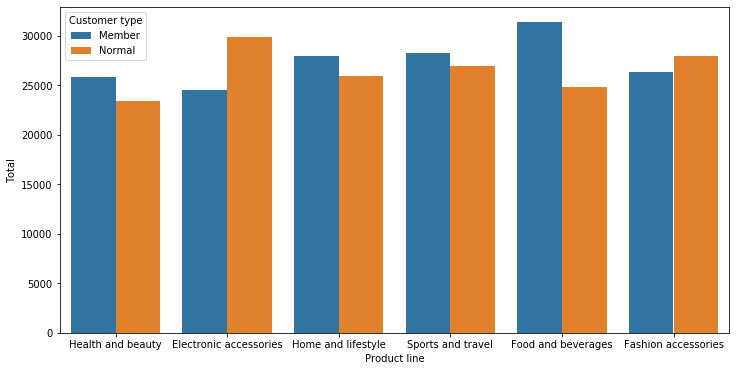

In [21]:
plt.figure(figsize = (12,6))
sns.barplot(x = df['Product line'], y = df['Total'], estimator = sum, ci = None, hue = df['Customer type'])

comparing branches by product lines. In Yangon, 'Home and lifestyle' contributed to the highest sales total. In Naypyitaw, 'Food and beverages' held the distinction. In Mandalay, there is a close tie between 'Health and beauty' and 'Sports and travel'. 

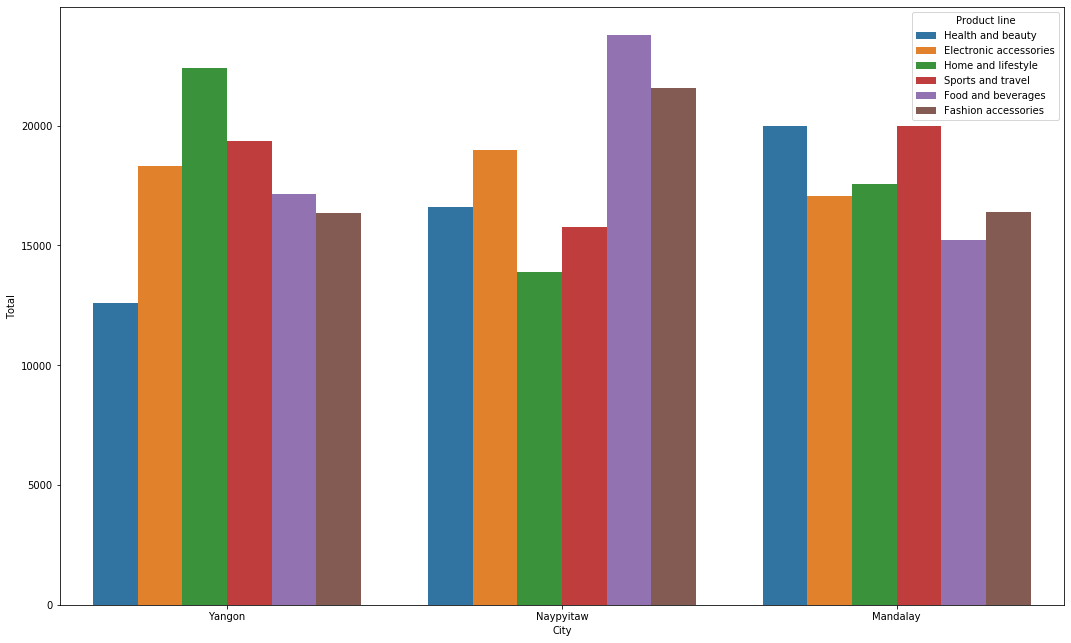

In [22]:
plt.figure(figsize = (18,11))
sns.barplot(x = df['City'], y = df['Total'], hue = df['Product line'], estimator = sum,ci = None)

members totals are only slightly higher than normal customers' toals

In [23]:
print('member: ',df[df['Customer type'] == 'Member']['Total'].sum())

member:  164223.44400000002


In [24]:
print('normal: ',df[df['Customer type'] == 'Normal']['Total'].sum())

normal:  158743.305


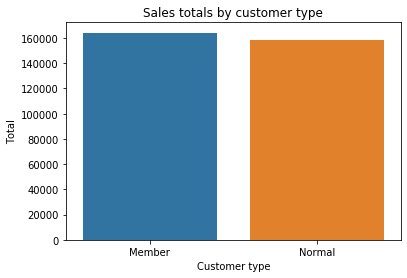

In [25]:
plt.title('Sales totals by customer type')
sns.barplot(x = df['Customer type'], y = df['Total'], estimator = sum,ci = None)

Though, it looks like members buy in more quantity

In [26]:
for customer in df['Customer type'].unique():
    print(customer + ' {:0.2f}'.format(df[df['Customer type'] == customer]['Quantity'].sum()))

Member 2785.00
Normal 2725.00


lets work with date and time columns to see if these features are relevant

In [27]:
df[['Date','Time']].head()

,Date,Time
0,1/5/2019,13:08
1,3/8/2019,10:29
2,3/3/2019,13:23
3,1/27/2019,20:33
4,2/8/2019,10:37


splitting date into month

In [28]:
df['Month'] = df['Date'].apply(lambda date: date.split('/')[0])

In [29]:
df['Month']

0      1
1      3
2      3
3      1
4      2
      ..
995    1
996    3
997    2
998    2
999    2
Name: Month, Length: 1000, dtype: object

'Month' is now a column composed of the month of purchase. Let's see the distribution of total across months of the year

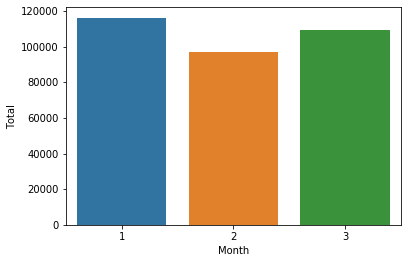

In [30]:
sns.barplot(x = df['Month'], y = df['Total'], estimator = sum,ci = None)

Most sales seem to have occured in January. February had the least amount of sales. 

In [31]:
df['Hour'] = df['Time'].apply(lambda time: time.split(':')[0])
df['Hour'].head()

0    13
1    10
2    13
3    20
4    10
Name: Hour, dtype: object

Lets split the time column into an hour column

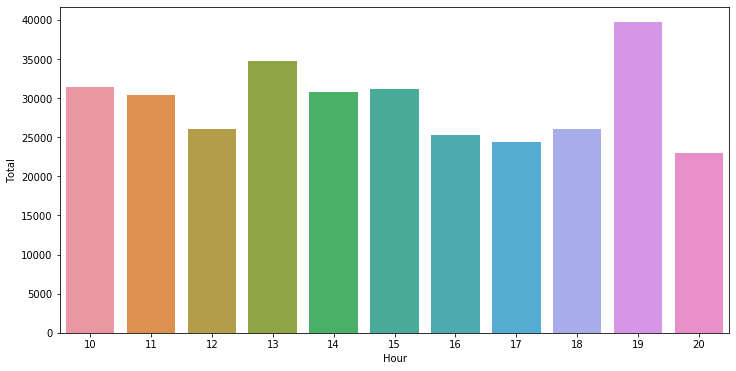

In [32]:
plt.figure(figsize = (12,6))
sns.barplot(x = df['Hour'], y = df['Total'], estimator = sum,ci = None)

It looks like most sales occured at 1900 hours, or 7 PM. 

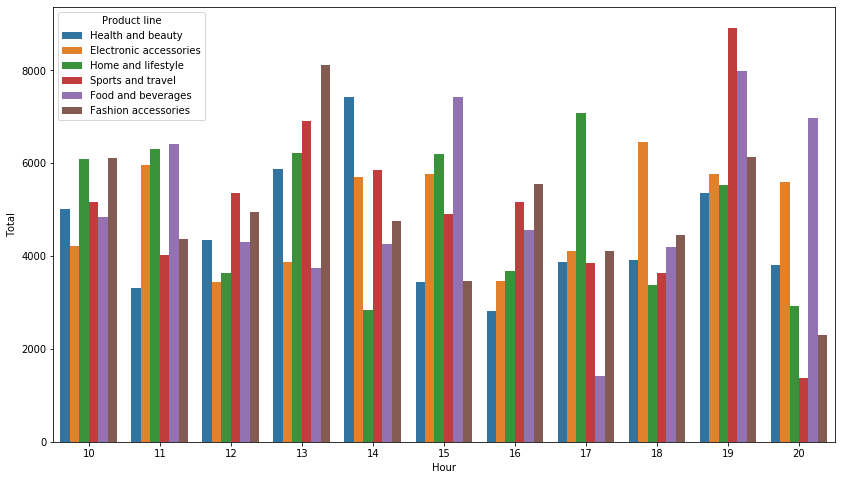

In [33]:
plt.figure(figsize = (14,8))
sns.barplot(x = df['Hour'], y = df['Total'], hue = df['Product line'], estimator = sum,ci = None)

At the most productive hour, 7PM, the majority of sales total belongs in 'Sports and travel' followed by 'Food and beverages' 

How about sales transactions by hour? Which hour is the busiest? Does it reflect the sales totals by hour?

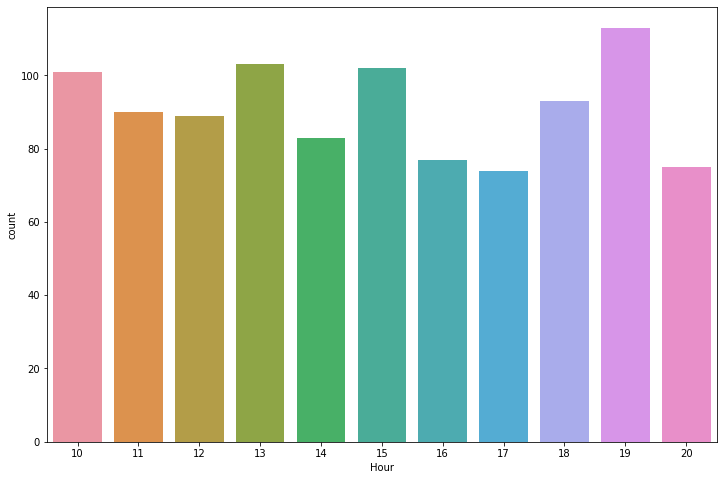

In [34]:
plt.figure(figsize = (12,8))
sns.countplot(df['Hour'])

It seems that 7PM also had the most transactions. 

Lets see the records where total purchase is in top 10% (1000 records means top 100 sales)

In [35]:
top_100_totals = sorted(df['Total'], reverse = True)[:100]

In [36]:
df['Top 100'] = df['Total'].apply(lambda total: 1 if total in top_100_totals else 0)

In [37]:
top100 = df[df['Top 100'] == 1]

here's a reduced dataframe that includes only the top 100 sales totals

In [38]:
top100.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Month,Hour,Top 100
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0,2,11,1
14,829-34-3910,A,Yangon,Normal,Female,Health and beauty,71.38,10,35.6900,749.4900,3/29/2019,19:21,Cash,713.80,4.761905,35.6900,5.7,3,19,1
31,149-71-6266,B,Mandalay,Member,Male,Sports and travel,78.07,9,35.1315,737.7615,1/28/2019,12:43,Cash,702.63,4.761905,35.1315,4.5,1,12,1
43,228-96-1411,C,Naypyitaw,Member,Female,Food and beverages,98.70,8,39.4800,829.0800,3/4/2019,20:39,Cash,789.60,4.761905,39.4800,7.6,3,20,1
49,574-22-5561,C,Naypyitaw,Member,Female,Fashion accessories,82.63,10,41.3150,867.6150,3/19/2019,17:08,Ewallet,826.30,4.761905,41.3150,7.9,3,17,1


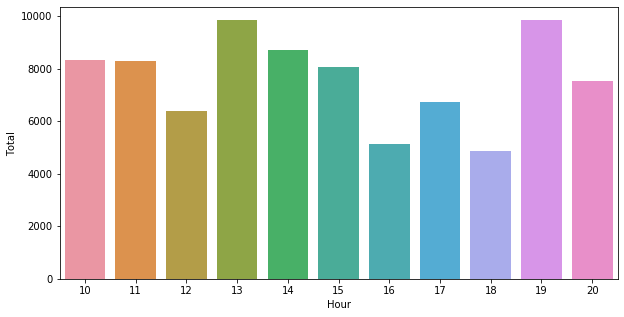

In [58]:
plt.figure(figsize = (10,5))
sns.barplot(x = top100['Hour'], y = top100['Total'], estimator = sum,ci = None)

most top spenders still shop at 7PM. But it looks like 1PM is another popular time for them

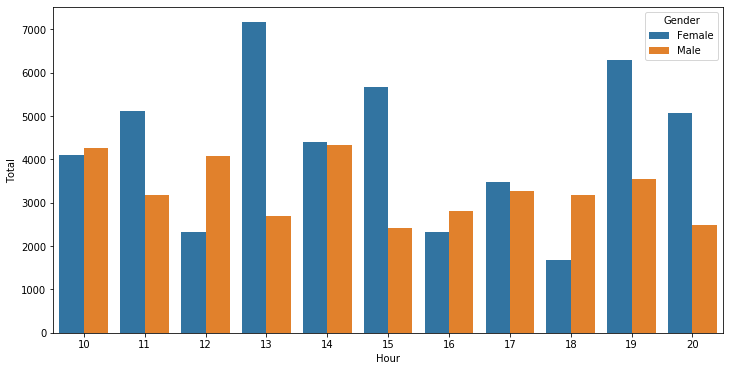

In [40]:
plt.figure(figsize = (12,6))
sns.barplot(x = top100['Hour'], y = top100['Total'], hue = top100['Gender'], estimator = sum,ci = None)

At the popular times of 1PM (1300) and 1900 (7PM), top spending females were the majority by 2-3 times as much as males. Top spending females were also the majority shoppers at 1100 (11AM), 1500 (3PM) and 2000 (10PM). Top spending males were only the majority at 1200 (12PM), 1600 (4PM) and 1800 (6PM)

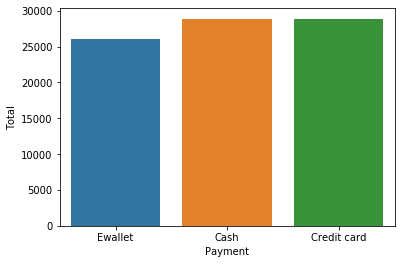

In [41]:
sns.barplot(x = top100['Payment'], y = top100['Total'], estimator = sum,ci = None)

top spenders mostly use credit card or cash

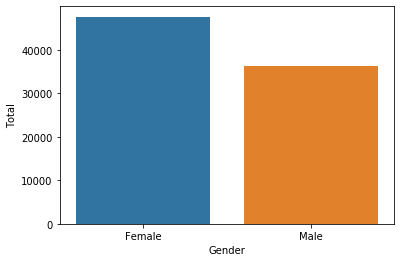

In [42]:
sns.barplot(x = top100['Gender'], y = top100['Total'], estimator = sum,ci = None)

females comprise the majority of the top spenders

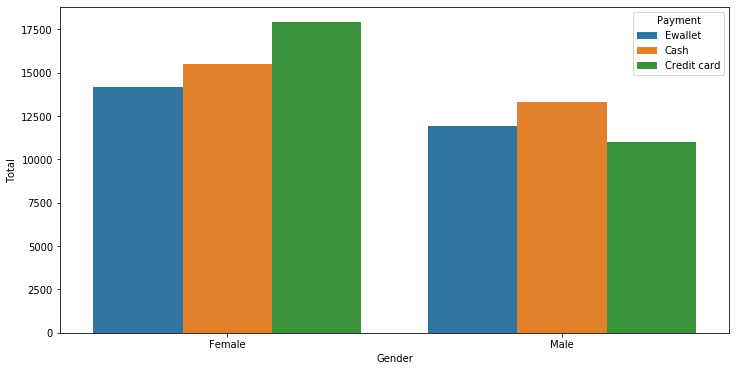

In [43]:
plt.figure(figsize = (12,6))
sns.barplot(x = top100['Gender'], y = top100['Total'], hue = top100['Payment'], estimator = sum,ci = None)

top spending females mainly used credit card whereas top spendings males mainly used cash

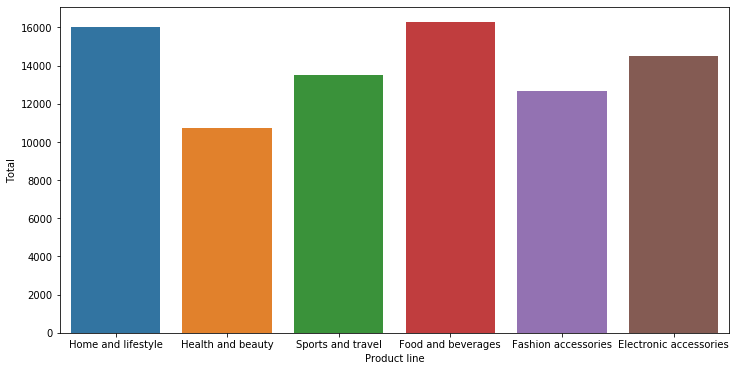

In [44]:
plt.figure(figsize = (12,6))
sns.barplot(x = top100['Product line'], y = top100['Total'], estimator = sum,ci = None)

top spenders mostly purchased 'Home and lifestyle' and 'Food and beverages' products. 'Health and beauty' was the least popular category amongst them.

Text(0.5, 1.0, 'Comparing Genders of Top 10% Spenders in Different Categories')

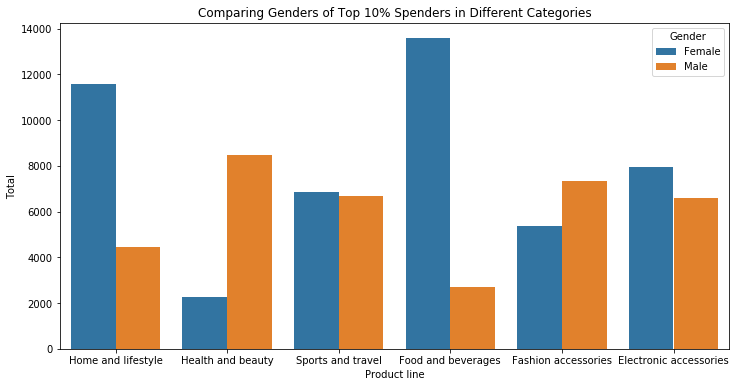

In [60]:
plt.figure(figsize = (12,6))
sns.barplot(x = top100['Product line'], y = top100['Total'], hue = top100['Gender'], estimator = sum,ci = None)
plt.title('Comparing Genders of Top 10% Spenders in Different Categories')

top spending females were the majority buyers of 'Home and lifestyle' products and 'Food and beverages' products. Top spending males were the majority 'Health and beauty' buyers along with 'Fashion accessories

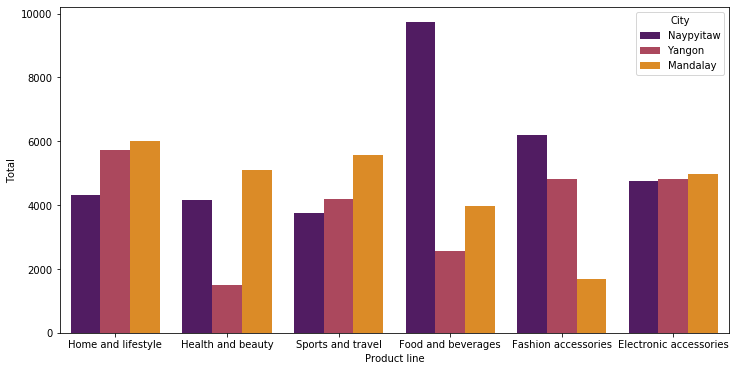

In [46]:
plt.figure(figsize = (12,6))
sns.barplot(x = top100['Product line'], y = top100['Total'], hue = top100['City'], estimator = sum,ci = None, palette = 'inferno')

Naypyitaw has a noticeable sales total in 'Food and beverages' amongst top 100 spenders. 'Electronic accessories' are fairly even across the three branches. 'Health and beauty' is negligible in Yangon branch. 'Fashion accessories' are negligible in Mandalay branch.

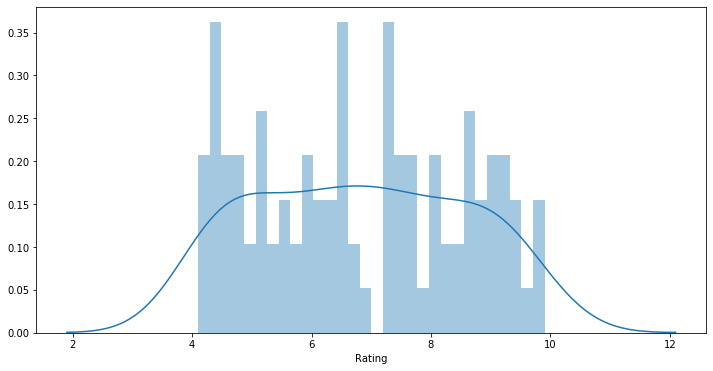

In [47]:
plt.figure(figsize = (12,6))
sns.distplot(top100['Rating'], bins = 30)

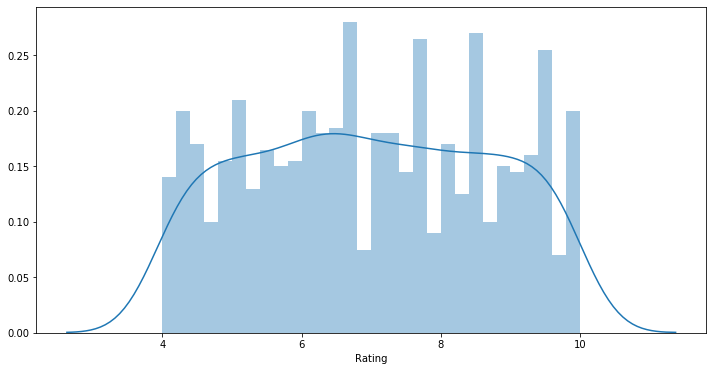

In [48]:
plt.figure(figsize = (12,6))
sns.distplot(df['Rating'], bins = 30)

The above two distributions show a fairly symmetric distribution of ratings. The top plot displays ratings distributions of top 100 spenders. The bottom plot shows the ratings distribution among the entire dataset. It's worth noting there is a spike in the 4 - 5 level ratings in the top distribution. Conversely, there are three large spikes between 8 and 10 in the bottom distribution. Does this indicate that top spenders are more critical of the products they buy? 

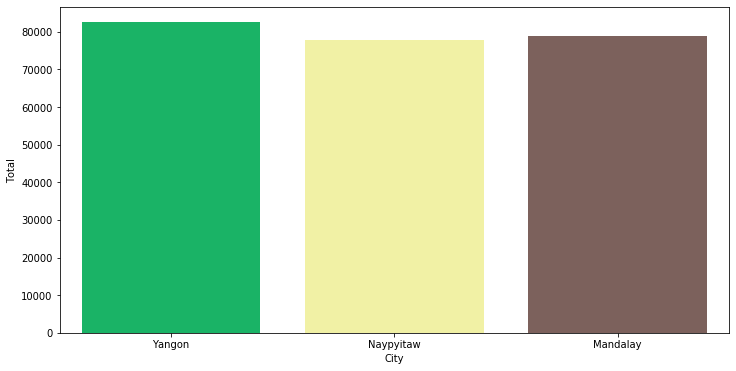

In [49]:
plt.figure(figsize = (12,6))
sns.barplot(x = df[df['Top 100'] == 0]['City'], y = df[df['Top 100'] == 0]['Total'],estimator = sum,ci = None, palette = 'terrain')


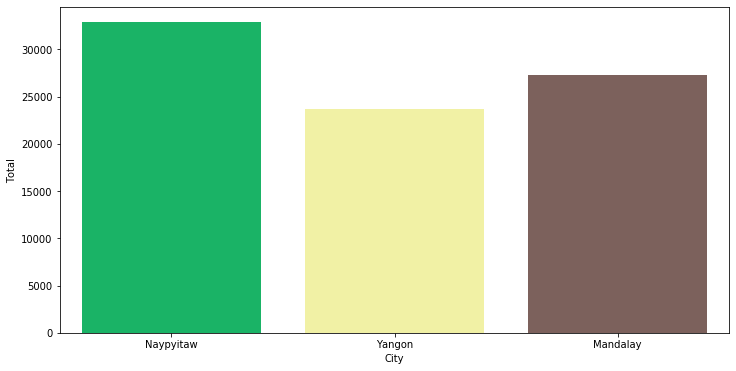

In [50]:
plt.figure(figsize = (12,6))
sns.barplot(x = top100['City'], y = top100['Total'],estimator = sum,ci = None, palette = 'terrain')

The bar charts above show the gross income generated per city branch. The bottom chart shows results for the top 100 spenders and the upper chart shows results for the remaining 90%. Amongst top spenders, Naypyitaw saw the greatest gross income. Meanwhile, amongst the remaining spenders, Yangon saw marginally higher gross income.

In [51]:
df[df['Top 100'] == 0]['gross income'].sum()

11388.532000000001

In [52]:
top100['gross income'].sum()

3990.837

In [53]:
df[df['Top 100'] == 0]['gross income'].mean()

12.653924444444431

In [54]:
top100['gross income'].mean()

39.90837000000002

## Linear Regression

### Predicting the sale total of a transaction

#### Cleaning and preparing dataset for machine learning

In [55]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating', 'Month', 'Hour', 'Top 100'],
      dtype='object')

In [56]:
revised_df = df.drop(columns = ['Invoice ID', 'City', 'Quantity', 'Tax 5%', 'Date','Time','cogs','gross margin percentage', 'gross income', 'Rating', 'Top 100'], axis = 1)

In [108]:
revised_df.head()

,Branch,Customer type,Gender,Product line,Unit price,Total,Payment,Month,Hour
0,A,Member,Female,Health and beauty,74.69,548.9715,Ewallet,1,13
1,C,Normal,Female,Electronic accessories,15.28,80.2200,Cash,3,10
2,A,Normal,Male,Home and lifestyle,46.33,340.5255,Credit card,3,13
3,A,Member,Male,Health and beauty,58.22,489.0480,Ewallet,1,20
4,A,Normal,Male,Sports and travel,86.31,634.3785,Ewallet,2,10


Unncessary columns deleted. 'Invoice ID' is random generated and unique. If we know the 'Quantity', we can calculate the total. 'Tax 5%', 'cogs', and 'gross income' are derived from the total and 'Quantity'. 'Date' and 'Time' are replaced by 'Month' and 'Hour'. 'Rating' occurs after a customer buys something. 'Top 100' is a feature used for exploratory analysis and can only be determined by knowing the total. 'Gross margin percentage' is the same value in every record and is therefore useless. 

Therefore, we want to know what total will we get based on the branch, type of customer, their gender, the product line and unit price of the item they are buying, the method of payment, and the month and hour of purchase.

#### Importing sklearn libraries to create a data pipeline for column transformation and then perform linear regression with a cross validation score

In [69]:
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder

#### split data into features and target

In [68]:
# X for features
X = revised_df.drop(['Total'], axis = 1)
# y for target
y = revised_df['Total']

In [66]:
X.head()

,Branch,Customer type,Gender,Product line,Unit price,Payment,Month,Hour
0,A,Member,Female,Health and beauty,74.69,Ewallet,1,13
1,C,Normal,Female,Electronic accessories,15.28,Cash,3,10
2,A,Normal,Male,Home and lifestyle,46.33,Credit card,3,13
3,A,Member,Male,Health and beauty,58.22,Ewallet,1,20
4,A,Normal,Male,Sports and travel,86.31,Ewallet,2,10


In [67]:
y.head()

0    548.9715
1     80.2200
2    340.5255
3    489.0480
4    634.3785
Name: Total, dtype: float64

#### data frame for machine learning involves converting categorical columns to encoded values

In [110]:
df_ml = pd.get_dummies(revised_df, columns = ['Branch','Customer type','Gender','Product line','Payment'],
              prefix=['branch','cust_type','g','product','pay'],drop_first=True)

In [112]:
df_ml.head()

,Unit price,Total,Month,Hour,branch_B,branch_C,cust_type_Normal,g_Male,product_Fashion accessories,product_Food and beverages,product_Health and beauty,product_Home and lifestyle,product_Sports and travel,pay_Credit card,pay_Ewallet
0,74.69,548.9715,1,13,0,0,0,0,0,0,1,0,0,0,1
1,15.28,80.2200,3,10,0,1,1,0,0,0,0,0,0,0,0
2,46.33,340.5255,3,13,0,0,1,1,0,0,0,1,0,1,0
3,58.22,489.0480,1,20,0,0,0,1,0,0,1,0,0,0,1
4,86.31,634.3785,2,10,0,0,1,1,0,0,0,0,1,0,1


In [85]:
from sklearn.model_selection import train_test_split

In [113]:
X = df_ml.drop(['Total'], axis = 1)
y = df_ml['Total']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [116]:
linreg = LinearRegression()

In [117]:
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [118]:
linreg.intercept_

40.05036569053027

In [119]:
coeff_df = pd.DataFrame(linreg.coef_, X.columns, columns=['Coefficient'])
coeff_df.head()

,Coefficient
Unit price,5.771329
Month,0.586780
Hour,-2.400385
branch_B,2.855523
branch_C,12.464348


In [120]:
predictions = linreg.predict(X_test)

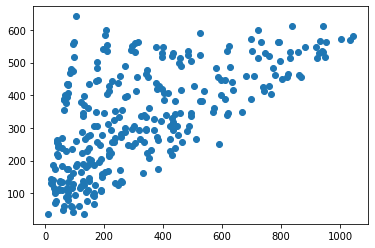

In [121]:
plt.scatter(y_test, predictions)

The scatter plot does not seem to show a strong correlation between predictions and actual values

In [122]:
from sklearn import metrics


In [126]:
print('MSE: ', metrics.mean_squared_error(y_test,predictions).round(2))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test,predictions)).round(2))

MSE:  39168.03
RMSE:  197.91


The mean square error (MSE) is fairly high at 39,168.03. The root mean square error (RMSE) of 197.91 doesn't bode well for our predictions considering the average total

In [132]:
print('average total:', round(df['Total'].mean(),2))

average total: 322.97


A key problem with this dataset is that there are only 1000 records. More records would surely help the linear regression model in making better predictions. Had the data been collected from a span of one year as opposed to 3 months, there would be more input available to assist the machine learning task

The next step would be to consider feature engineering to see if it helps the linear regression model, as well as attempting different models to see if they yield better results. However, the purpose of this project was to explore the available data and derive insights from the makeup of the sales, not to predict what total sale would be. 

For the final section, I'll demonstrate making a pipeline with sklearn that will streamline the process. 

### Making a machine learning pipeline

In [136]:
# column transformer takes input columns and converts them to encoded variables, similar to the pandas get_dummies() function
# done earlier

column_trans = make_column_transformer((OneHotEncoder(handle_unknown = 'ignore'),
                                       ['Branch','Customer type','Gender','Product line','Payment']),
                                      remainder = 'passthrough')

In [140]:
X = revised_df.drop(['Total'], axis = 1)
y = revised_df['Total']

In [141]:
# creating the linear regression model and pipeline
linreg = LinearRegression()
pipe = make_pipeline(column_trans, linreg)

In [142]:
#cross_val_score performs the actual learning. CV = 10 means 10 runs of the model, mixing the data around each time

cross_val_score(pipe, X, y, cv = 10, scoring = 'r2').mean().round(2)

0.37

The cross validated R2 score, calculated after 10 trials of running the model, is only 0.37. A perfect score (not so ideal either, but a benchmark for comparison) would be 1.0. Ideally, a great linear regression model would score between 0.90 and 0.99. (A score of 1.0 could indicate overfitting, and therefore is not desireable).

## Conclusion

Though the machine learning delivered dissapointing results, the exploratory analysis did lead to several insights that may be of use to a marketing / executive team. Thanks to the analysis, there are several takeaways. 



##### Takeaways

- Females prefer cash and credit card, and members prefer credit card.

- Members spend more in Food and Beverage products, while normal customers spend more in Electronic Accessories.

- Naypyitaw has high sales volume in Food and Beverage. Yangon has it in Home and Lifestyle. Mandalay is tied in Health and Beauty and Sports and Travel

- February had the least amount of sales. January the most. 

- The most popular shopping time was 1900 (7PM) among all customers as well as top spenders. At 1900, Sports and Travel was the most popular category. 

- 1300 (1PM) is another popular time that saw many Fashion Accessory sales.

- Among top spenders, females were the majority shoppers at 1300 (1PM), 1900 (7PM) and 2000 (8PM).

- Top spenders used cash and credit card moreso than ewallet.

- Top spenders were mostly female. The top spending females used credit card most often (cash was dominant for males)

- Top spending females spent much more in Food and Beverage and Home and Lifestyle compared to top spending males.
 
- Top spending males spent much more in Health and Beauty compared to top spending females.

- Naypyitaw branch saw a significant majority share of Food and Beverage totals amongst the three branches.

- Top spenders had a spike of ratings in the 4 - 5 range.

- Naypyitaw benefited the most with totals from top spenders. 

##### Recommendations

Additional data gathering is needed. A target of 10,000 records may be a suitable start. In addition, there is benefit in gaining data spread throughout the year, so there is representation in every month of the year. There may be further patterns found in terms of seasonality, such as if certain product lines are purchased more frequently in summer rather than winter.

Also, more feautures may prove useful. Features may include customer age and address; the length of their membership if they are members; their balance information if they are members; more specific product categories; etc...